In [1]:
# load modules
import os
import numpy as np
import pandas as pd

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv(os.path.join('data', 'house regression.csv'))
data.head()

,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,year_2014,quarter_0,quarter_1,quarter_2,price
0,47.6747,-122.303,4,2.25,2.0,1,8,5,3750,5000,2440,1310,94,0,0,0,1,0,1310000
1,47.6914,-122.308,2,1.75,1.0,1,6,3,1390,6670,720,670,77,0,0,0,1,0,445500
2,47.5951,-122.144,5,2.00,1.5,1,7,3,1870,7344,1870,0,58,0,0,0,1,0,450000
3,47.3273,-122.370,3,2.00,1.0,1,7,4,1410,44866,1410,0,33,0,0,0,1,0,335000
4,47.3584,-122.163,5,3.00,2.0,1,9,3,3223,6371,3223,0,4,0,0,0,1,0,479349


In [3]:
# target variable: price
y = data['price'].values

X = data.drop('price', axis=1)

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019)

### 1. Fit models

In [5]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

In [7]:
treeBagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                               n_estimators=50)
treeBagging.fit(X_train, y_train)
y_treeBagging = treeBagging.predict(X_test)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

In [9]:
lrBagging = BaggingRegressor(base_estimator=LinearRegression(),
                             n_estimators=150)
lrBagging.fit(X_train, y_train)
y_lrBagging = lrBagging.predict(X_test)

In [10]:
X_train.columns

Index(['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'year_2014', 'quarter_0', 'quarter_1',
       'quarter_2'],
      dtype='object')

In [11]:
X_train1 = X_train.iloc[:,:-5]
X_train2 = X_train.iloc[:,-5:]
X_test1 = X_test.iloc[:,:-5]
X_test2 = X_test.iloc[:,-5:]

In [69]:
poly=PolynomialFeatures(degree=3)
poly_X_train1 = poly.fit_transform(X_train1)
poly_X_test1 = poly.fit_transform(X_test1)


In [70]:
poly_X_train1 = pd.DataFrame(poly_X_train1)
poly_X_test1 = pd.DataFrame(poly_X_test1)

poly_X_train1.index =  X_train1.index
poly_X_test1.index =  X_test1.index

In [71]:
poly_X_train1.columns = poly.get_feature_names(X_train1.columns)
poly_X_test1.columns = poly.get_feature_names(X_train1.columns)

In [73]:
poly_X_train1.shape

(13106, 560)

In [74]:
poly_X_train = pd.concat([poly_X_train1,X_train2],axis=1)
poly_X_test = pd.concat([poly_X_test1,X_test2],axis=1)

In [75]:
poly_lr = LinearRegression()
poly_lr.fit(poly_X_train, y_train)
y_poly_lr = poly_lr.predict(poly_X_test)

In [76]:
poly_X_train.shape

(13106, 565)

In [77]:
poly_lrBagging = BaggingRegressor(base_estimator=LinearRegression(),
                             n_estimators=50)
poly_lrBagging.fit(poly_X_train, y_train)
y_poly_lrBagging = poly_lrBagging.predict(poly_X_test)

### 2. Evaluation

In [79]:
mse_tree = mean_squared_error(y_test, y_tree)
mse_treeBagging = mean_squared_error(y_test, y_treeBagging)
mse_lr = mean_squared_error(y_test, y_lr)
mse_lrBagging = mean_squared_error(y_test, y_lrBagging)
mse_poly_lr = mean_squared_error(y_test, y_poly_lr)
mse_poly_lrBagging = mean_squared_error(y_test, y_poly_lrBagging)

r2_tree = r2_score(y_test, y_tree)
r2_treeBagging = r2_score(y_test, y_treeBagging)
r2_lr = r2_score(y_test, y_lr)
r2_lrBagging = r2_score(y_test, y_lrBagging)
r2_poly_lr = r2_score(y_test, y_poly_lr)
r2_poly_lrBagging = r2_score(y_test, y_poly_lrBagging)

In [80]:
print('[Tree   - vanila ] R-square = {:.2f} | MSE = {:.2f}'.format(r2_tree, mse_tree))
print('[Tree   - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_treeBagging, mse_treeBagging))
print('[Linear - vanila ] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lr, mse_lr))
print('[Linear - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lrBagging, mse_lrBagging))
print('[PolyLinear - vanila ] R-square = {:.2f} | MSE = {:.2f}'.format(r2_poly_lr, mse_poly_lr))
print('[PolyLinear - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_poly_lrBagging, mse_poly_lrBagging))

[Tree   - vanila ] R-square = 0.75 | MSE = 36019385922.86
[Tree   - Bagging] R-square = 0.87 | MSE = 18167228715.05
[Linear - vanila ] R-square = 0.69 | MSE = 44087173663.19
[Linear - Bagging] R-square = 0.69 | MSE = 44073537426.15
[PolyLinear - vanila ] R-square = 0.72 | MSE = 39477913438.01
[PolyLinear - Bagging] R-square = 0.80 | MSE = 28759759977.83


### 3. Visualize

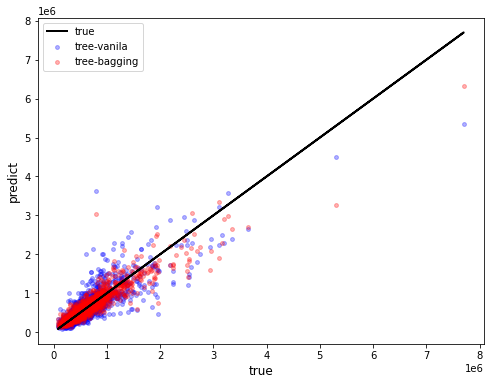

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_tree, s=15, alpha=0.3, color='blue', label='tree-vanila')
plt.scatter(y_test, y_treeBagging, s=15, alpha=0.3, color='red', label='tree-bagging')
plt.plot(y_test, y_test, alpha=1.0, lw=2, color='black', label='true')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.legend()
plt.show()

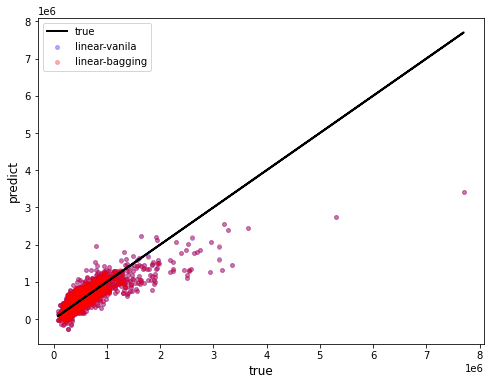

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lr, s=15, alpha=0.3, color='blue', label='linear-vanila')
plt.scatter(y_test, y_lrBagging, s=15, alpha=0.3, color='red', label='linear-bagging')
plt.plot(y_test, y_test, alpha=1.0, lw=2, color='black', label='true')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.legend()
plt.show()

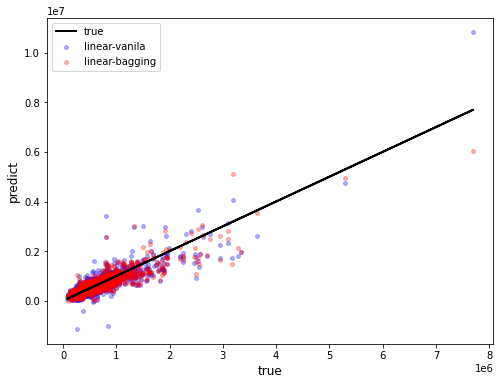

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_poly_lr, s=15, alpha=0.3, color='blue', label='linear-vanila')
plt.scatter(y_test, y_poly_lrBagging, s=15, alpha=0.3, color='red', label='linear-bagging')
plt.plot(y_test, y_test, alpha=1.0, lw=2, color='black', label='true')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.legend()
plt.show()

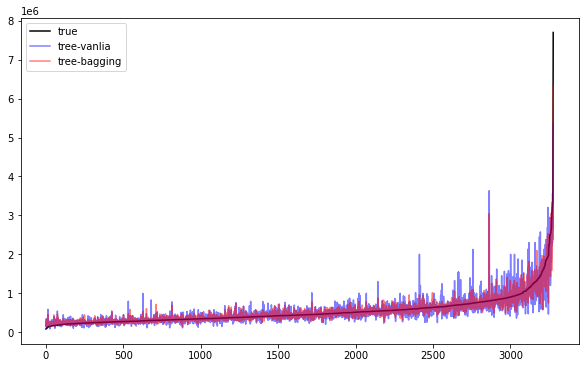

In [84]:
idx = y_test.argsort()

plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0, label='true')
plt.plot(y_tree[idx], color='blue', alpha=0.5, label='tree-vanlia')
plt.plot(y_treeBagging[idx], color='red', alpha=0.5, label='tree-bagging')
plt.legend()
plt.show()

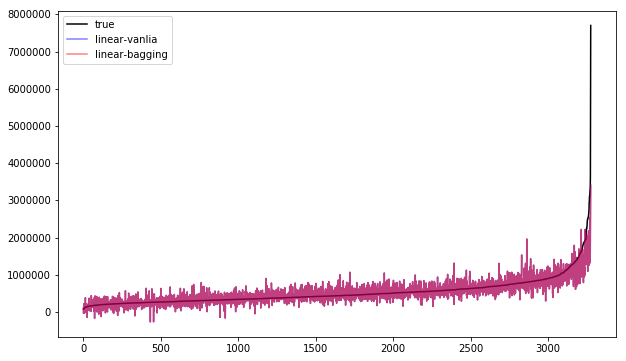

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0, label='true')
plt.plot(y_lr[idx], color='blue', alpha=0.5, label='linear-vanlia')
plt.plot(y_lrBagging[idx], color='red', alpha=0.5, label='linear-bagging')
plt.legend()
plt.show()

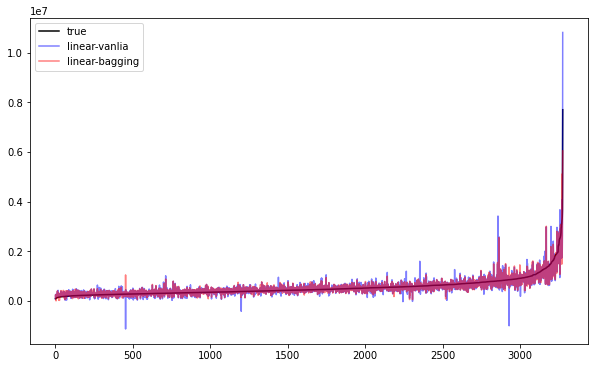

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0, label='true')
plt.plot(y_poly_lr[idx], color='blue', alpha=0.5, label='linear-vanlia')
plt.plot(y_poly_lrBagging[idx], color='red', alpha=0.5, label='linear-bagging')
plt.legend()
plt.show()

In [88]:
y_test

array([327000, 337000, 625000, ..., 700000, 688100, 338800], dtype=int64)